# Constraint Satisfaction Problems (CSPs)

This IPy notebook acts as supporting material for topics covered in **Chapter 6 Constraint Satisfaction Problems** of the book* Artificial Intelligence: A Modern Approach*. We make use of the implementations in **csp.py** module. Even though this notebook includes a brief summary of the main topics familiarity with the material present in the book is expected. We will look at some visualizations and solve some of the CSP problems described in the book. Let us import everything from the csp module to get started.

In [1]:
from csp import *

## Review

CSPs are a special kind of search problems. Here we don't treat the space as a black box but the state has a particular form and we use that to our advantage to tweak our algorithms to be more suited to the problems. A CSP State is defined by a set of variables which can take values from corresponding domains. These variables can take only certain values in their domains to satisfy the constraints. A set of assignments which satisfies all constraints passes the goal test. Let us start by exploring the CSP class which we will use to model our CSPs. You can keep the popup open and read the main page to get a better idea of the code.


In [2]:
%psource CSP

The __ _ _init_ _ __ method parameters specify the CSP. Variable can be passed as a list of strings or integers. Domains are passed as dict where key specify the variables and value specify the domains. The variables are passed as an empty list. Variables are extracted from the keys of the domain dictionary. Neighbor is a dict of variables that essentially describes the constraint graph. Here each variable key has a list its value which are the variables that are constraint along with it. The constraint parameter should be a function **f(A, a, B, b**) that **returns true** if neighbors A, B **satisfy the constraint** when they have values **A=a, B=b**. We have additional parameters like nassings which is incremented each time an assignment is made when calling the assign method. You can read more about the methods and parameters in the class doc string. We will talk more about them as we encounter their use. Let us jump to an example.

## Graph Coloring

We use the graph coloring problem as our running example for demonstrating the different algorithms in the **csp module**. The idea of map coloring problem is that the adjacent nodes (those connected by edges) should not have the same color throughout the graph. The graph can be colored using a fixed number of colors. Here each node is a variable and the values are the colors that can be assigned to them. Given that the domain will be the same for all our nodes we use a custom dict defined by the **UniversalDict** class. The **UniversalDict** Class takes in a parameter which it returns as value for all the keys of the dict. It is very similar to **defaultdict** in Python except that it does not support item assignment.

In [3]:
s = UniversalDict(['R','G','B'])
s[5]

['R', 'G', 'B']

For our CSP we also need to define a constraint function **f(A, a, B, b)**. In this what we need is that the neighbors must not have the same color. This is defined in the function **different_values_constraint** of the module.

In [4]:
%psource different_values_constraint

The CSP class takes neighbors in the form of a Dict. The module specifies a simple helper function named **parse_neighbors** which allows to take input in the form of strings and return a Dict of the form compatible with the **CSP Class**.

In [5]:
%pdoc parse_neighbors

The **MapColoringCSP** function creates and returns a CSP with the above constraint function and states. The variables our the keys of the neighbors dict and the constraint is the one specified by the **different_values_constratint** function. **australia**, **usa** and **france** are three CSPs that have been created using **MapColoringCSP**. **australia** corresponds to ** Figure 6.1 ** in the book.

In [6]:
%psource MapColoringCSP

In [7]:
australia, usa, france

(<csp.CSP at 0x7fba14061a20>,
 <csp.CSP at 0x7fba14067b38>)

### Helper Functions

We will now implement few helper functions that will help us visualize the Coloring Problem. We will make some modifications to the existing Classes and Functions for additional book keeping. To begin with we modify the **assign** and **unassign** methods in the **CSP** to add a copy of the assignment to the **assingment_history**. We call this new class **InstruCSP**. This would allow us to see how the assignment evolves over time.

In [8]:
import copy
class InstruCSP(CSP):
    
    def __init__(self, variables, domains, neighbors, constraints):
        super().__init__(variables, domains, neighbors, constraints)
        self.assingment_history = []
        
    def assign(self, var, val, assignment):
        super().assign(var,val, assignment)
        self.assingment_history.append(copy.deepcopy(assignment))
    
    def unassign(self, var, assignment):
        super().unassign(var,assignment)
        self.assingment_history.append(copy.deepcopy(assignment)) 

Next, we define **make_instru** which takes an instance of **CSP** and returns a **InstruCSP** instance. 

In [9]:
def make_instru(csp):
    return InstruCSP(csp.variables, csp.domains, csp.neighbors,
               csp.constraints)

We will now use a graph defined as a dictonary for plotting purposes in our Graph Coloring Problem. The keys are the nodes and their corresponding values are the nodes are they are connected to.

In [10]:
neighbors = {
    0: [6, 11, 15, 18, 4, 11, 6, 15, 18, 4], 
    1: [12, 12, 14, 14], 
    2: [17, 6, 11, 6, 11, 10, 17, 14, 10, 14], 
    3: [20, 8, 19, 12, 20, 19, 8, 12], 
    4: [11, 0, 18, 5, 18, 5, 11, 0], 
    5: [4, 4], 
    6: [8, 15, 0, 11, 2, 14, 8, 11, 15, 2, 0, 14], 
    7: [13, 16, 13, 16], 
    8: [19, 15, 6, 14, 12, 3, 6, 15, 19, 12, 3, 14], 
    9: [20, 15, 19, 16, 15, 19, 20, 16], 
    10: [17, 11, 2, 11, 17, 2], 
    11: [6, 0, 4, 10, 2, 6, 2, 0, 10, 4], 
    12: [8, 3, 8, 14, 1, 3, 1, 14], 
    13: [7, 15, 18, 15, 16, 7, 18, 16], 
    14: [8, 6, 2, 12, 1, 8, 6, 2, 1, 12], 
    15: [8, 6, 16, 13, 18, 0, 6, 8, 19, 9, 0, 19, 13, 18, 9, 16], 
    16: [7, 15, 13, 9, 7, 13, 15, 9], 
    17: [10, 2, 2, 10], 
    18: [15, 0, 13, 4, 0, 15, 13, 4], 
    19: [20, 8, 15, 9, 15, 8, 3, 20, 3, 9], 
    20: [3, 19, 9, 19, 3, 9]
}

Now we are ready to create an InstruCSP instance for our problem. We are doing this for an instance of **MapColoringProblem** class which inherits from the **CSP** Class. This means that our **make_instru** function will work perfectly for it.

In [11]:
coloring_problem = MapColoringCSP('RGBY', neighbors)

In [12]:
coloring_problem1 = make_instru(coloring_problem)

# Backtracking Search

For solving a CSP the main issue with Naive search algorithms is that they can continue expanding obviously wrong paths. In backtracking search, we check constraints as we go. Backtracking is just the above idea combined with the fact that we are dealing with one variable at a time. Backtracking Search is implemented in the repository as the function **backtracking_search**. This is the same as **Figure 6.5** in the book. The function takes as input a CSP and few other optional parameters which can be used to further speed it up. The function returns the correct assignment if it satisfies the goal. We will discuss these later. Let us solve our **coloring_problem1** with **backtracking_search**.


In [13]:
result = backtracking_search(coloring_problem1)

In [14]:
result # A dictonary of assingments.

{0: 'R',
 1: 'R',
 2: 'R',
 3: 'R',
 4: 'G',
 5: 'R',
 6: 'G',
 7: 'R',
 8: 'B',
 9: 'R',
 10: 'G',
 11: 'B',
 12: 'G',
 13: 'G',
 14: 'Y',
 15: 'Y',
 16: 'B',
 17: 'B',
 18: 'B',
 19: 'G',
 20: 'B'}

Let us also check the number of assingments made.

In [15]:
coloring_problem1.nassigns

21

Now let us check the total number of assingments and unassingments which is the lentgh ofour assingment history.

In [16]:
len(coloring_problem1.assingment_history)

21

### Visualization

Next, we define some functions to create the visualisation from the assingment_history of **coloring_problem1**. The reader need not concern himself with the code that immediately follows as it is the usage of Matplotib with IPython Widgets. If you are interested in reading more about these visit [ipywidgets.readthedocs.io](http://ipywidgets.readthedocs.io). We will be using the **networkx** library to generate graphs. These graphs can be treated as the graph that needs to be colored or as a constraint graph for this problem. If interested you can read a dead simple tutorial [here](https://www.udacity.com/wiki/creating-network-graphs-with-python). We start by importing the necessary libraries and initializing matplotlib inline.


In [17]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib

The ipython widgets we will be using require the plots in the form of a step function such that there is a graph corresponding to each value. We define the **make_update_step_function** which return such a function. It takes in as inputs the neighbors/graph along with an instance of the **InstruCSP**. This will be more clear with the example below. If this sounds confusing do not worry this is not the part of the core material and our only goal is to help you visualize how the process works.

In [18]:
def make_update_step_function(graph, instru_csp):
    
    def draw_graph(graph):
        # create networkx graph
        G=nx.Graph(graph)
        # draw graph
        pos = nx.spring_layout(G,k=0.15)
        return (G, pos)
    
    G, pos = draw_graph(graph)
    
    def update_step(iteration):
        # here iteration is the index of the assingment_history we want to visualize.
        current = instru_csp.assingment_history[iteration]
        #  We convert the particular assingment to a default dict so that the color for nodes which 
        # have not been assigned defaults to black.
        current = defaultdict(lambda: 'Black', current)

        # Now we use colors in the list and default to black otherwise.
        colors = [current[node] for node in G.node.keys()]
        # Finally drawing the nodes.
        nx.draw(G, pos, node_color=colors, node_size=500)

        labels = {label:label for label in G.node}
        # Labels shifted by offset so as to not overlap nodes.
        label_pos = {key:[value[0], value[1]+0.03] for key, value in pos.items()}
        nx.draw_networkx_labels(G, label_pos, labels, font_size=20)

        # show graph
        plt.show()

    return update_step  # <-- this is a function
    

Finally let us plot our problem. We first use the function above to obtain a step function.

In [19]:
step_func = make_update_step_function(neighbors, coloring_problem1)

Next we set the canvas size.

In [20]:
matplotlib.rcParams['figure.figsize'] = (18.0, 18.0)

Finally our plot using ipywidget slider and matplotib. You can move the slider to experiment and see the coloring change. It is also possible to move the slider using arrow keys or to jump to the value by directly editing the number with a double click.

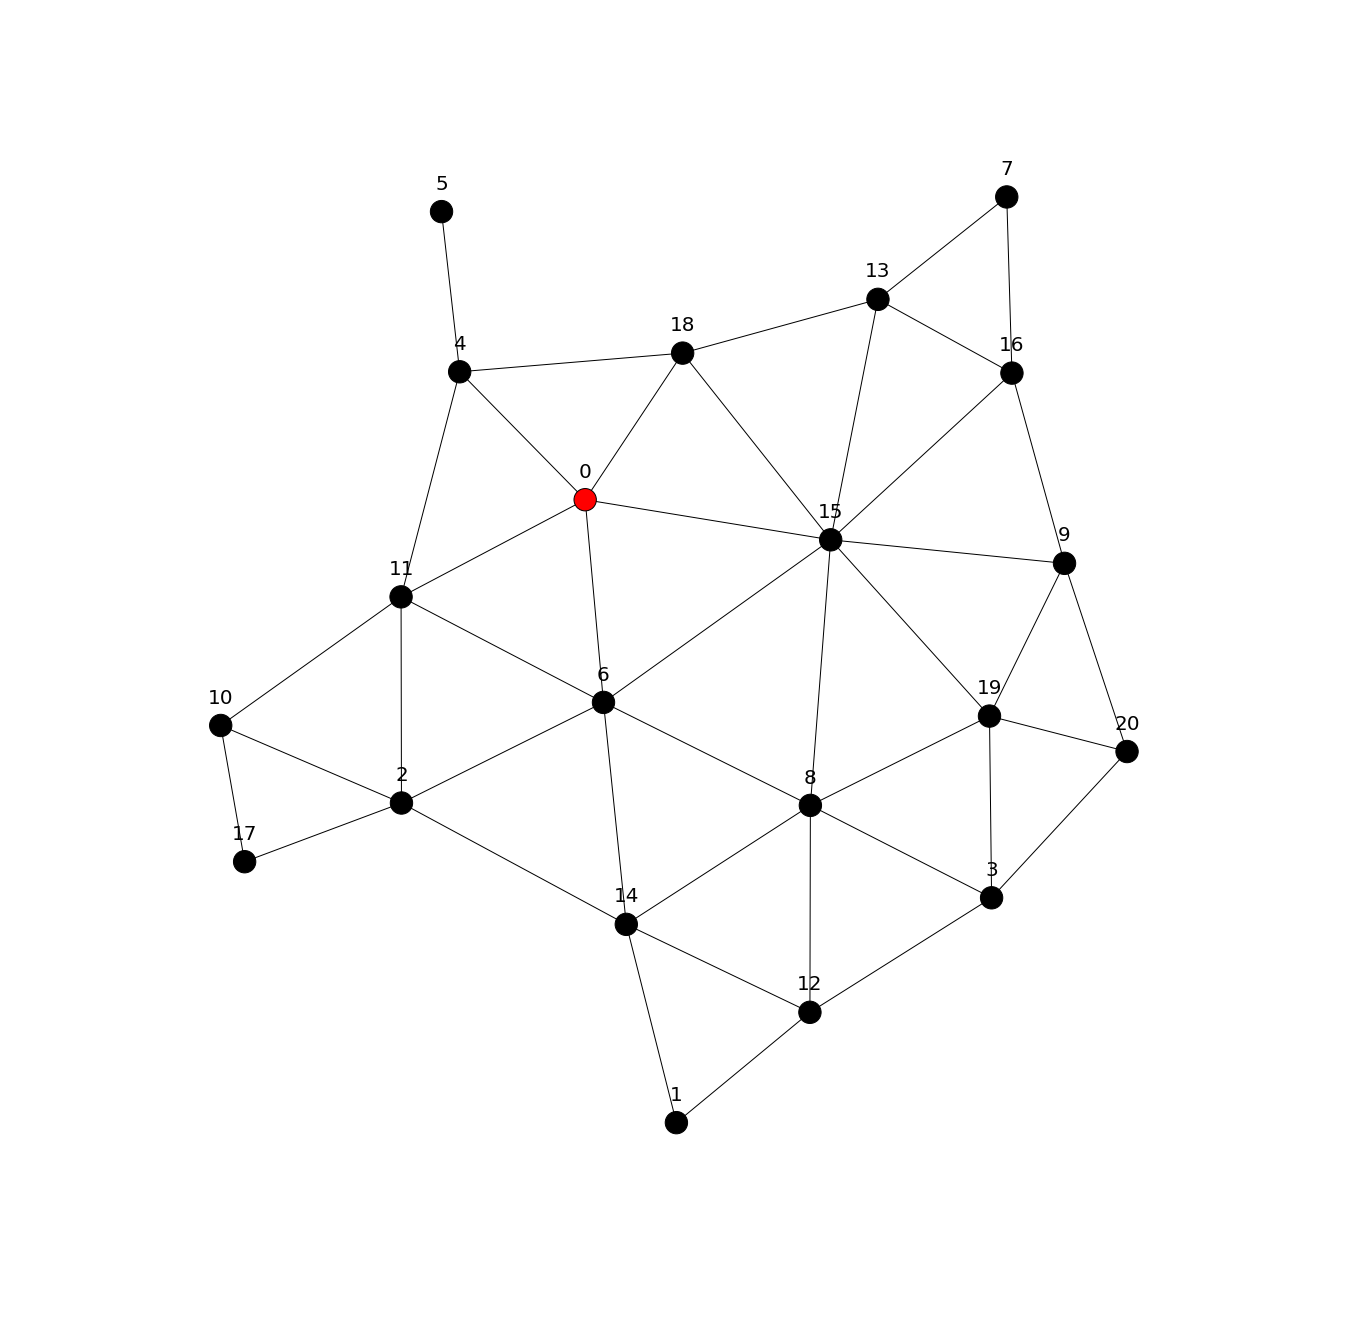

In [21]:
import ipywidgets as widgets
from IPython.display import display

iteration_slider = widgets.IntSlider(min=0, max=len(coloring_problem1.assingment_history)-1, step=1, value=0)
w=widgets.interactive(step_func,iteration=iteration_slider)
display(w)

## NQueens Visualization

Just like the Graph Coloring Problem we will start with defining a few helper functions to help us visualize the assignments as they evolve over time. The **make_plot_board_step_function** behaves similar to the **make_update_step_function** introduced earlier. It initializes a chess board in the form of a 2D grid with alternating 0s and 1s. This is used by **plot_board_step** function which draws the board using matplotlib and adds queens to it. This function also calls the **label_queen_conflicts** which modifies the grid placing 3 in positions in a position where there is a conflict.

In [22]:
def label_queen_conflicts(assingment,grid):
    ''' Mark grid with queens that are under conflict. '''
    for col, row in assingment.items(): # check each queen for conflict
        row_conflicts = {temp_col:temp_row for temp_col,temp_row in assingment.items() 
                         if temp_row == row and temp_col != col}
        up_conflicts = {temp_col:temp_row for temp_col,temp_row in assingment.items() 
                        if temp_row+temp_col == row+col and temp_col != col}
        down_conflicts = {temp_col:temp_row for temp_col,temp_row in assingment.items() 
                          if temp_row-temp_col == row-col and temp_col != col}
        
        # Now marking the grid.
        for col, row in row_conflicts.items():
                grid[col][row] = 3
        for col, row in up_conflicts.items():
                grid[col][row] = 3
        for col, row in down_conflicts.items():
                grid[col][row] = 3

    return grid

def make_plot_board_step_function(instru_csp):
    '''ipywidgets interactive function supports
       single parameter as input. This function
       creates and return such a function by taking
       in input other parameters.
    '''
    n = len(instru_csp.variables)
    
    
    def plot_board_step(iteration):
        ''' Add Queens to the Board.'''
        data = instru_csp.assingment_history[iteration]
        
        grid = [[(col+row+1)%2 for col in range(n)] for row in range(n)]
        grid = label_queen_conflicts(data, grid) # Update grid with conflict labels.
        
        # color map of fixed colors
        cmap = matplotlib.colors.ListedColormap(['white','lightsteelblue','red'])
        bounds=[0,1,2,3] # 0 for white 1 for black 2 onwards for conflict labels (red).
        norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
        
        fig = plt.imshow(grid, interpolation='nearest', cmap = cmap,norm=norm)

        plt.axis('off')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)

        # Place the Queens Unicode Symbol
        for col, row in data.items():
            fig.axes.text(row, col, u"\u265B", va='center', ha='center', family='Dejavu Sans', fontsize=32)
        plt.show()
    
    return plot_board_step

Now let us visualize a solution obtained via backtracking. We use of the previosuly defined **make_instru** function for keeping a history of steps.

In [23]:
eight_queens_csp = NQueensCSP(8)
backtracking_instru_queen = make_instru(eight_queens_csp)
result = backtracking_search(backtracking_instru_queen)

In [24]:
backtrack_queen_step = make_plot_board_step_function(backtracking_instru_queen) # Step Function for Widgets

Now finally we set some matplotlib parameters to adjust how our plot will look. The font is necessary because the Black Queen Unicode character is not a part of all fonts. You can move the slider to experiment and observe the how queens are assigned. It is also possible to move the slider using arrow keys or to jump to the value by directly editing the number with a double click.


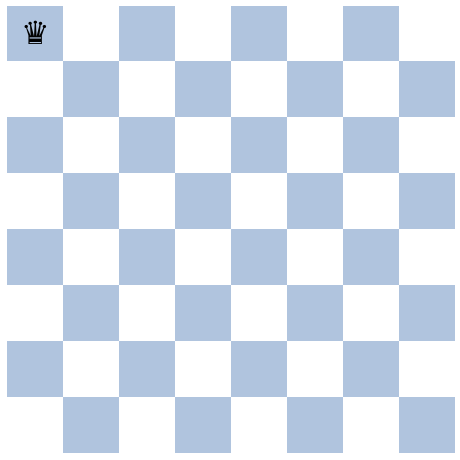

In [25]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
matplotlib.rcParams['font.family'].append(u'Dejavu Sans')

iteration_slider = widgets.IntSlider(min=0, max=len(backtracking_instru_queen.assingment_history)-1, step=0, value=0)
w=widgets.interactive(backtrack_queen_step,iteration=iteration_slider)
display(w)

Now let us finally repeat the above steps for **min_conflicts** solution.

In [26]:
twelve_queens_csp = NQueensCSP(12)
conflicts_instru_queen = make_instru(eight_queens_csp)
result = min_conflicts(conflicts_instru_queen)

In [27]:
conflicts_step = make_plot_board_step_function(conflicts_instru_queen)

The visualization has same features as the above. But here it also highlights the conflicts by labeling the conflicted queens with a red background.

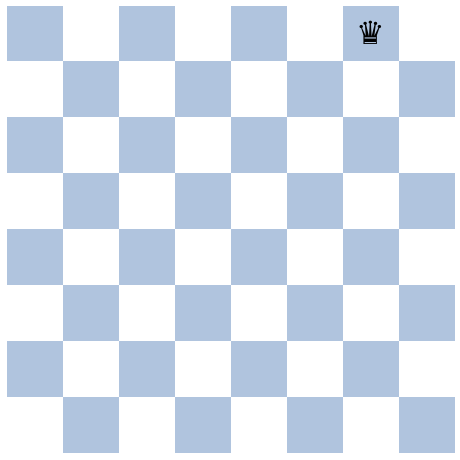

In [28]:
iteration_slider = widgets.IntSlider(min=0, max=len(conflicts_instru_queen.assingment_history)-1, step=0, value=0)
w=widgets.interactive(conflicts_step,iteration=iteration_slider)
display(w)